In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

plt.style.use('ggplot')

<b> The Objective of this exercise is :
    1. Data Analysis
    2. Data Visualization - boxplot, jointplot, heatmap
    3. Feature selection - Corr, Univariate, RFE, RFECV, TKee based
    4. Random Forest
    5. Feature Extraction
    6. Principal Component Analysis
    
We use Breast cancer wisconsin dataset for this purpose

In [18]:
data = pd.read_csv('/Users/sandeep/Downloads/cancer data.csv')
data.shape

(569, 33)

In [19]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [21]:
y = data.diagnosis
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


No. of Malignant cases : 212
No. of Benign cases : 357


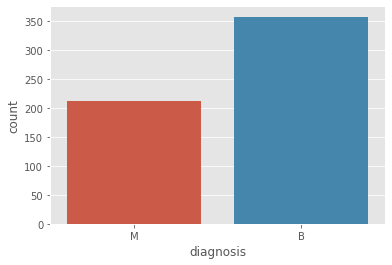

In [23]:
ax = sns.countplot(y, label='count')

B, M = y.value_counts()
print('No. of Malignant cases : {}'.format(M))
print('No. of Benign cases : {}'.format(B))

### Visualization

In [24]:
from sklearn.preprocessing import StandardScaler

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

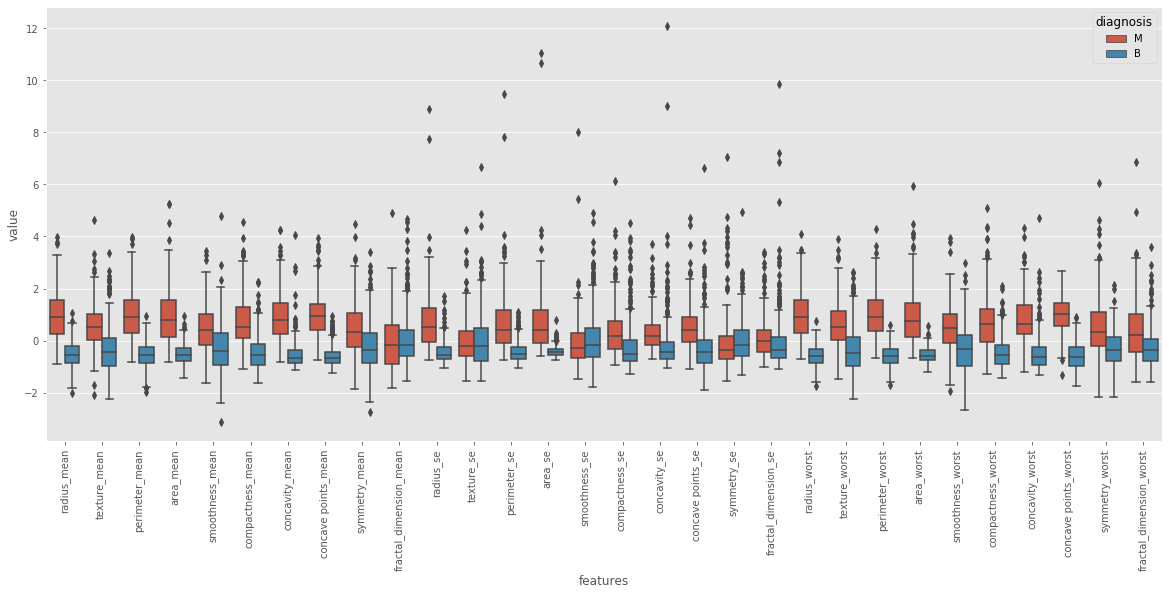

In [25]:
target = y.copy()
dataframe = X.copy()

scaler = StandardScaler()
data_stdzd = pd.DataFrame(scaler.fit_transform(dataframe),index=dataframe.index, columns=dataframe.columns)

# Using only the first 10 features from the dataset
dataframe = pd.concat([y, data_stdzd], axis=1)
dataframe = pd.melt(dataframe, id_vars='diagnosis', var_name='features', value_name='value')

plt.figure(figsize=(20,8))
sns.boxplot(x='features', y='value', hue='diagnosis', data=dataframe)
plt.xticks(rotation=90)

>From the plots we observe that Concavity_worst, Compactness_worst & Concave_points_worst are almost similar.
Are they correlated?

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text yticklabel objects>)

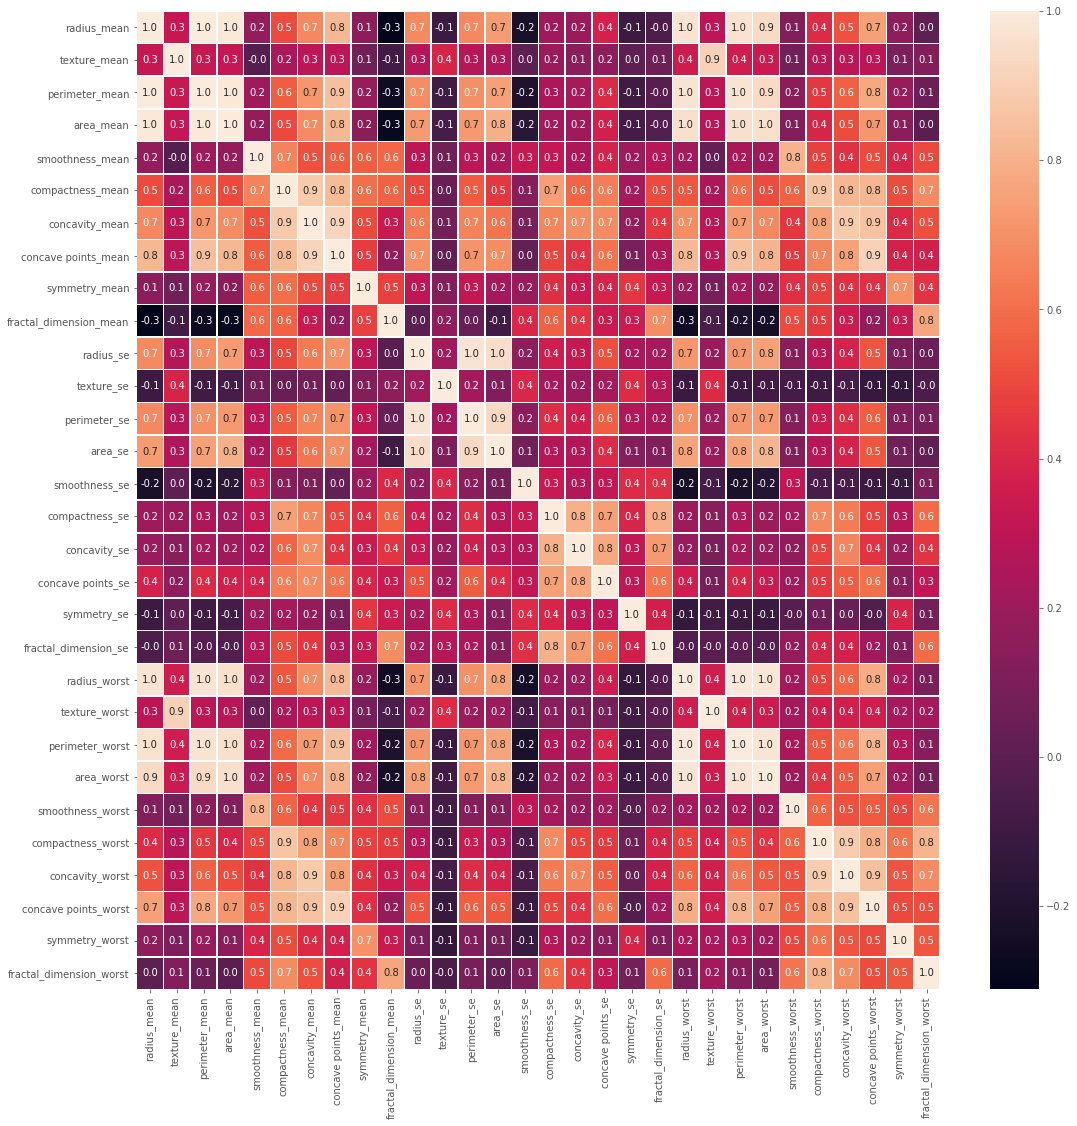

In [26]:
# Plot correlation map

fig, ax = plt.subplots(figsize=(18,18))
h1 = sns.heatmap(X.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

>From the heatmap we observe that radius_mean, perimeter_mean and area_mean are highly correlated. Hence
we will form the hypothesis that we choose only area_mean. 

In [27]:
to_be_dropped = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
                 'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
                 'compactness_se','concave points_se','texture_worst','area_worst']

X_reduced = X.drop(to_be_dropped, axis=1)
X_reduced.shape

(569, 16)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

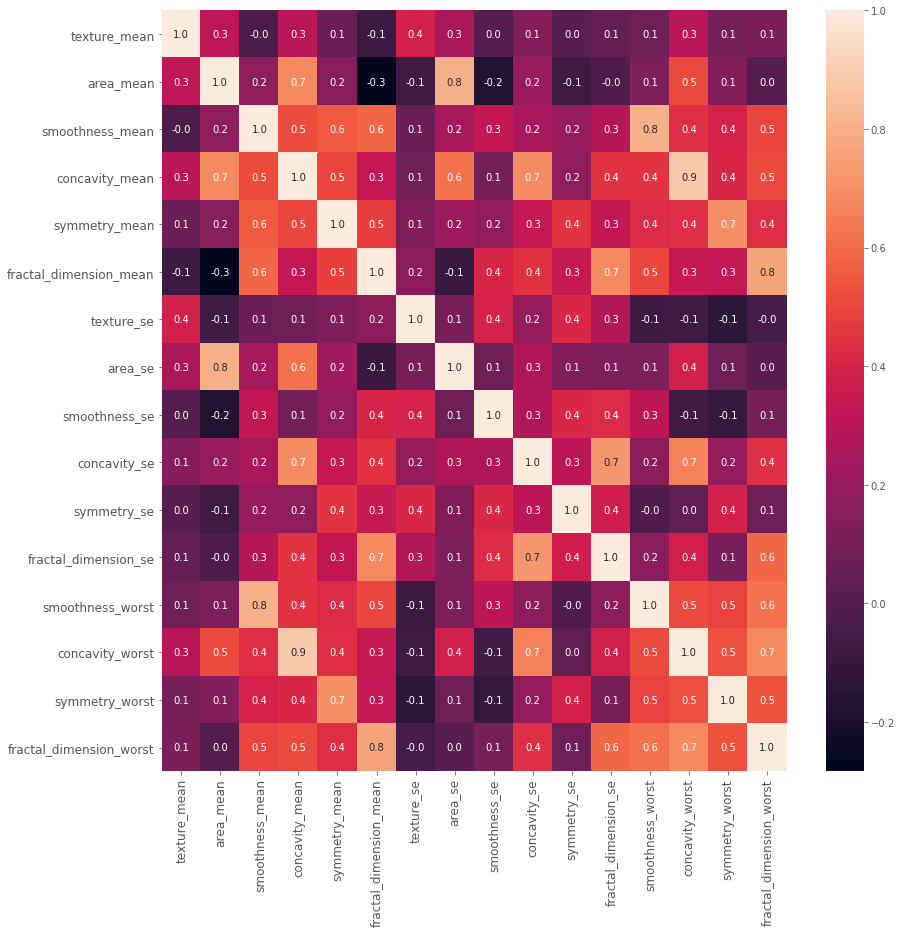

In [28]:
fig, ax = plt.subplots(figsize=(14,14))

sns.heatmap(X_reduced.corr(), annot=True, fmt='.1f', ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### 1. Feature Selection with correlation and Random Forest 

>Did we choose the correct features? Let's try using <I> Random Forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
print('Accuracy of Random Forest is : {:.3f}'.format(accuracy))

cm = confusion_matrix(y_test, rf_clf.predict(X_test))
print('Confusion Matrix : {}'.format(cm))

Accuracy of Random Forest is : 0.971
Confusion Matrix : [[106   2]
 [  3  60]]


#### 2. Univariate feature selection and Random Forest

In this method we select KBest that remove all except the K highest features. In this method we need
to choose the K value. <br> K= 5, 10, 15? The answer is only trial by error or intuition

In [31]:
# Lets try K = 5
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
kbselect = SelectKBest(score_func=chi2, k=5)
kbselect.fit(X,y)
array = kbselect.get_support(indices=True)
array

array([ 2,  3, 13, 22, 23])

In [33]:
X_new = pd.DataFrame(kbselect.fit_transform(X, y), index=X.index, columns=X.columns[array])
X_new.head()

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=1)

rf_clf2 = RandomForestClassifier(random_state=42)
rf_clf2.fit(X_train, y_train)

accuracy2 = accuracy_score(y_test, rf_clf2.predict(X_test))

print('Accuracy score : {:.3f}'.format(accuracy2))
print('Confusion Matrix  : ', confusion_matrix(y_test, rf_clf2.predict(X_test)))

Accuracy score : 0.916
Confusion Matrix  :  [[85  3]
 [ 9 46]]


Accuracy score has fallen. Lets try with a list of features.

In [35]:
accuracy2_dict = {}

for k in [5,6,7,8,9,10,11,12,13,14,15]:
    kbselect = SelectKBest(score_func=chi2, k=k)
    kbselect.fit(X,y)
    array = kbselect.get_support(indices=True)

    X_new = pd.DataFrame(kbselect.fit_transform(X, y), index=X.index, columns=X.columns[array])
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=1)

    rf_clf2 = RandomForestClassifier(random_state=42)
    rf_clf2.fit(X_train, y_train)

    accuracy2 = round(accuracy_score(y_test, rf_clf2.predict(X_test)), ndigits=4)
    accuracy2_dict[k] = accuracy2

print(accuracy2_dict)

{5: 0.9161, 6: 0.9161, 7: 0.9091, 8: 0.9091, 9: 0.9091, 10: 0.9091, 11: 0.9161, 12: 0.9371, 13: 0.9371, 14: 0.951, 15: 0.951}


We observe that the highest accuracy (95.1%) is observed for feature sizes 14 and 15. <br>Though this method doesn't give nay accurayc higher than the previous one. So we try the next.

#### 3. Recursive Feature Elimination with Random Forest

In [36]:
from sklearn.feature_selection import RFE

In [37]:
rf_clf3 = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_clf3, n_features_to_select=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
rfe.fit(X_train, y_train)

array = list(X_train.columns[rfe.support_])
print('Chosen best 5 columns : \n{}'.format(array))

Chosen best 5 columns : 
['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


#### 4. Recursive Feature Elimination with cross_validation and Random Forest Classifier

In [38]:
from sklearn.feature_selection import RFECV

In [39]:
rf_clf4 = RandomForestClassifier(random_state=42)
rfecv = RFECV(rf_clf4, min_features_to_select=1, cv=5, scoring='accuracy')

rfecv.fit(X_train, y_train)
print('Optimal no. features : {}'.format(rfecv.n_features_))
print('Best features : \n{}'.format(list(X.columns[rfecv.support_])))

Optimal no. features : 21
Best features : 
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


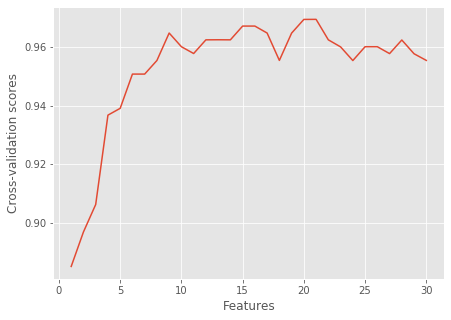

In [40]:
plt.figure(figsize=(7,5))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Cross-validation scores', fontsize=12)

plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

#### 5. Tree based Feature selection using Random Forest Classifier

<BarContainer object of 30 artists>

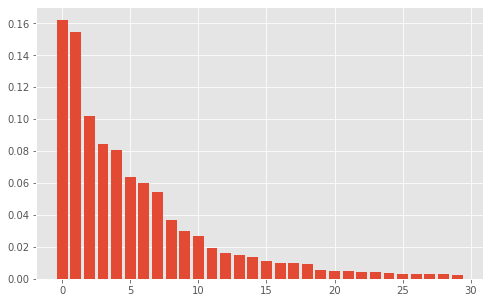

In [41]:
rf_clf5 = RandomForestClassifier(random_state=42)
rf_clf5.fit(X_train, y_train)

importances = rf_clf5.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(X_train.shape[1]), importances[indices])


### Feature Extraction

In [42]:
# Feature extraction using Principal component analysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [43]:
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_normalized.head()

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state=1)

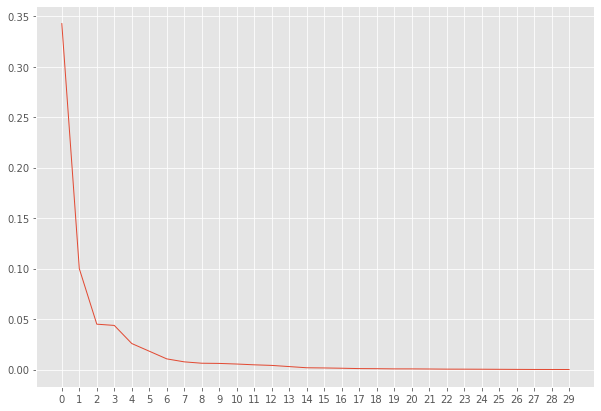

In [44]:
pca = PCA()
pca.fit(X_train)

plt.figure(figsize=(10,7))

plt.plot(pca.explained_variance_, linewidth=1)
plt.xticks(range(0,30))
plt.show()

> We observe the maximum variance at 3. Hence the value of number of components can be chosen as 3.

In [47]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
print('Original shape : {}'.format(X_train.shape))
print('Transformed shape : {}'.format(X_train_pca.shape))

Original shape : (426, 30)
Transformed shape : (426, 3)


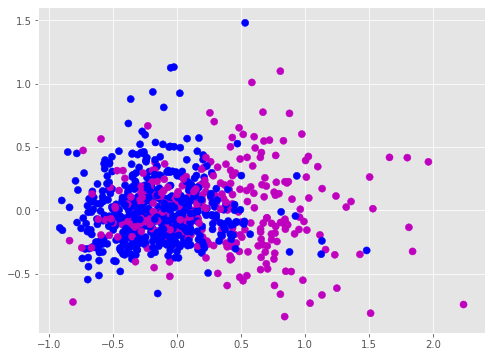

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=y_train, cmap='viridis', s=50)
plt.scatter(X_train_pca[:,1], X_train_pca[:,2], c=y_train, cmap='viridis', s=50)